<a href="https://colab.research.google.com/github/Mhmdaris15/students-academic-performance/blob/main/Students'_Academic_Performance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Dependency Files

In [31]:
from google.colab import files
files.upload()
!cp ./kaggle.json /root/.kaggle/kaggle.json
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip xAPI-Edu-Data.zip

xAPI-Edu-Data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  xAPI-Edu-Data.zip
replace xAPI-Edu-Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [32]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

### Exploratory Data Analysis (EDA)

In [33]:
# Read dataset
df = pd.read_csv("xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [35]:
df_numeric = df.select_dtypes(include='int64')
df_numeric.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [36]:
df_categoric = df.select_dtypes(include='object')
df_categoric.describe()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [37]:
cat_good_unique = df_categoric.describe().T.loc[df_categoric.describe().T['unique'] <= 3].index
cat_good_unique

Index(['gender', 'StageID', 'SectionID', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

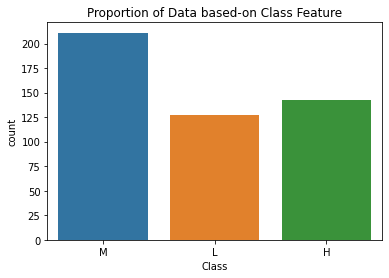

In [38]:
sns.countplot(x=df_categoric['Class'])
plt.title('Proportion of Data based-on Class Feature')
plt.show()

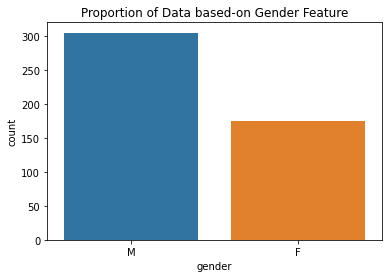

In [39]:
sns.countplot(x=df_categoric['gender'])
plt.title('Proportion of Data based-on Gender Feature')
plt.show()

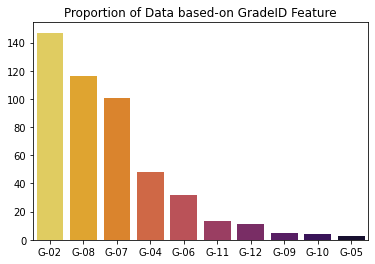

In [40]:
sns.barplot(x=df_categoric['GradeID'].value_counts().index, y=df_categoric['GradeID'].value_counts().values, palette='inferno_r', )
plt.title('Proportion of Data based-on GradeID Feature')
plt.show()

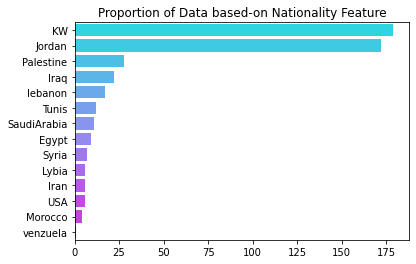

In [41]:
sns.barplot(x=df_categoric['NationalITy'].value_counts().values, y=df_categoric['NationalITy'].value_counts().index, palette='cool')
plt.title('Proportion of Data based-on Nationality Feature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


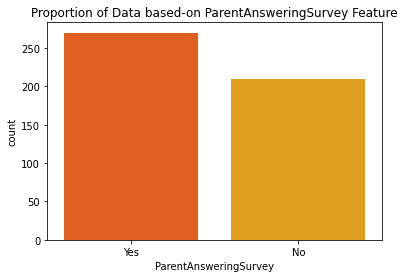

In [42]:
sns.countplot(df_categoric['ParentAnsweringSurvey'], palette='autumn')
plt.title('Proportion of Data based-on ParentAnsweringSurvey Feature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


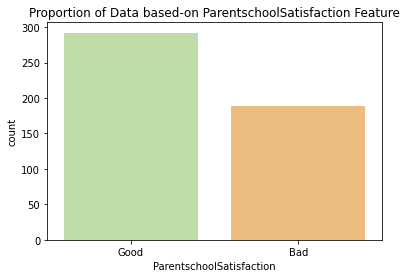

In [43]:
sns.countplot(df_categoric['ParentschoolSatisfaction'], palette='Spectral_r')
plt.title('Proportion of Data based-on ParentschoolSatisfaction Feature')
plt.show()

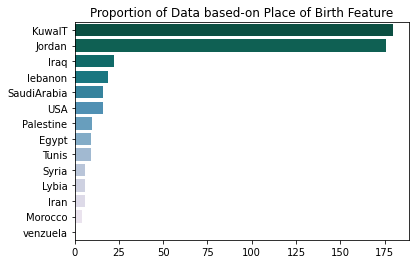

In [44]:
sns.barplot(x=df['PlaceofBirth'].value_counts().values, y=df['PlaceofBirth'].value_counts().index, palette='PuBuGn_r')
plt.title('Proportion of Data based-on Place of Birth Feature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


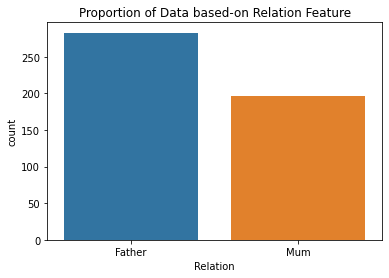

In [45]:
sns.countplot(df_categoric['Relation'])
plt.title('Proportion of Data based-on Relation Feature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


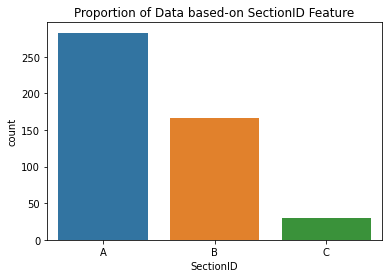

In [46]:
sns.countplot(df_categoric['SectionID'])
plt.title('Proportion of Data based-on SectionID Feature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


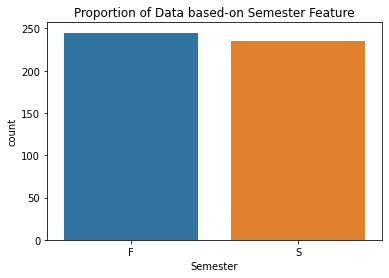

In [47]:
sns.countplot(df_categoric['Semester'])
plt.title('Proportion of Data based-on Semester Feature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


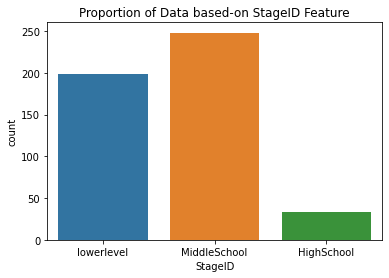

In [48]:
sns.countplot(df_categoric['StageID'])
plt.title('Proportion of Data based-on StageID Feature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Proportion of Data based-on StudentAbsenceDays Feature')

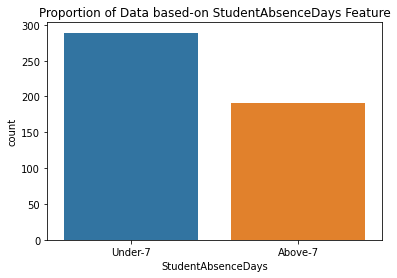

In [49]:
sns.countplot(df_categoric['StudentAbsenceDays'])
plt.title('Proportion of Data based-on StudentAbsenceDays Feature')

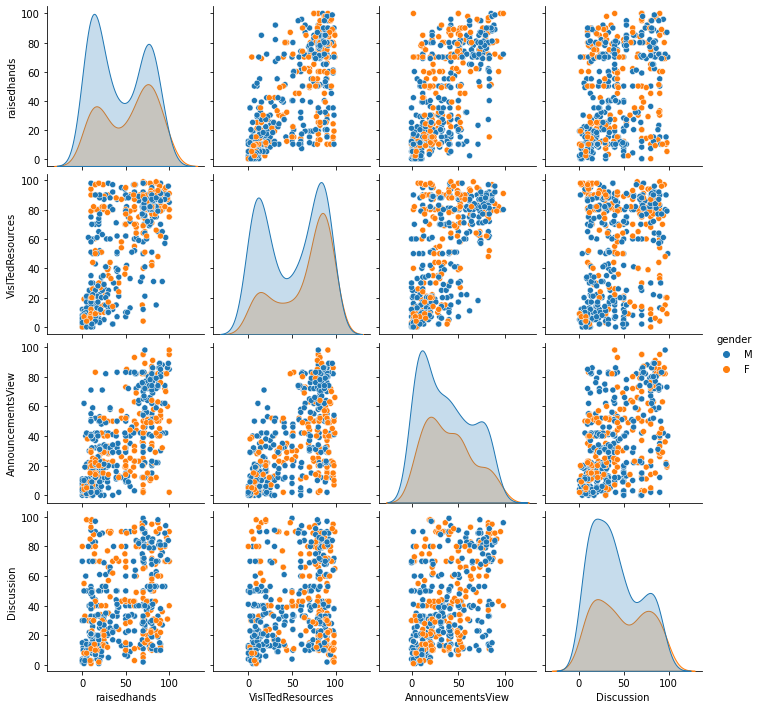

In [50]:
sns.pairplot(df, hue='gender')

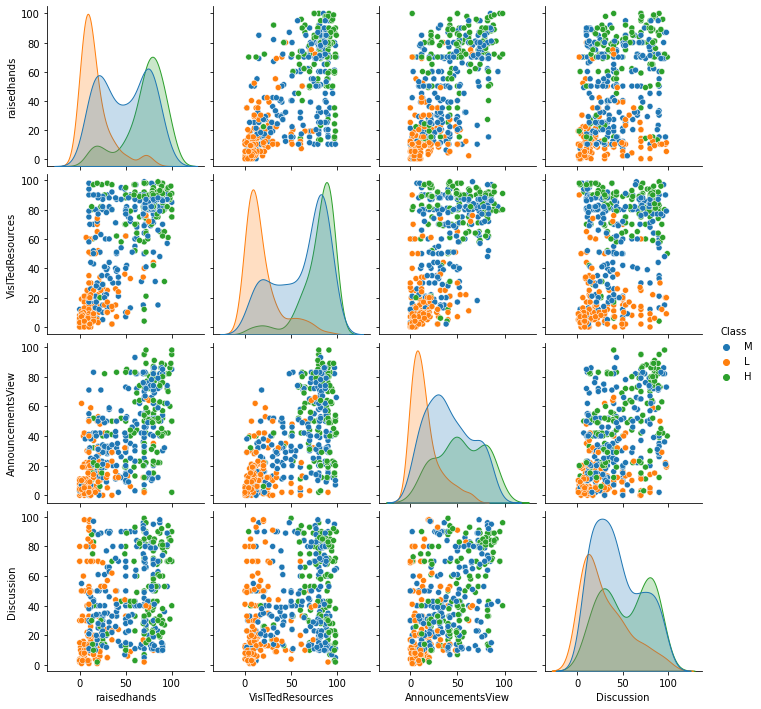

In [51]:
sns.pairplot(df, hue='Class')

In [90]:
import warnings
warnings.filterwarnings('ignore')

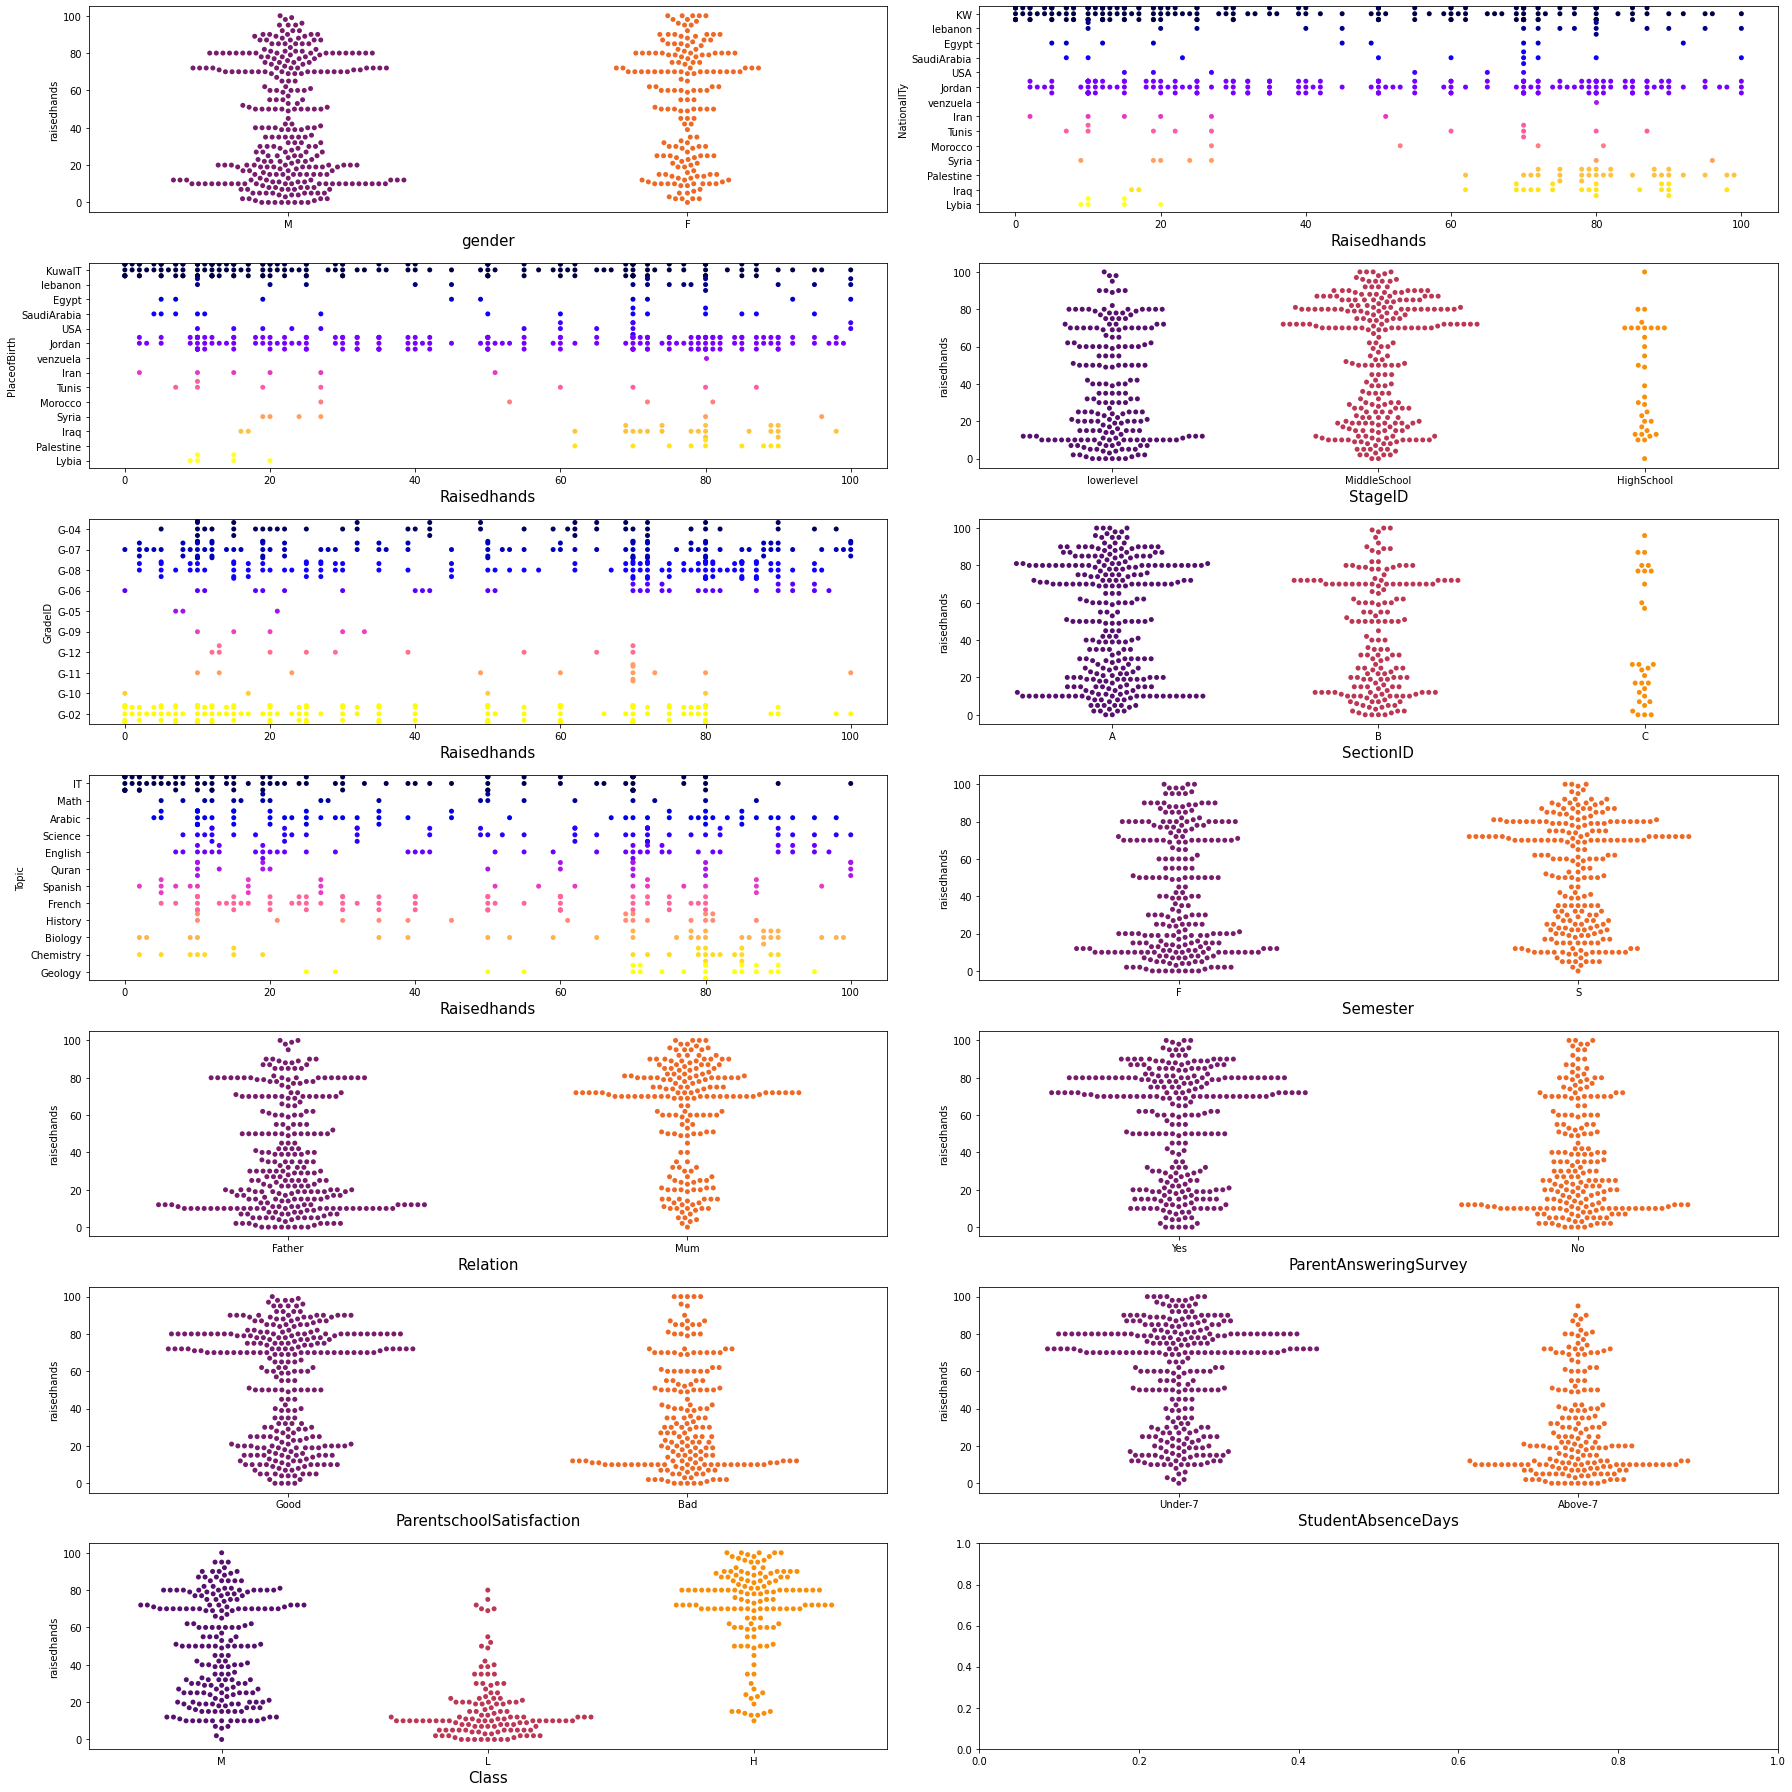

In [94]:
fig, ax = plt.subplots(7, 2, figsize=(25,25))
idx = 0
for i in range(7):
  for j in range(2):
    if i == 6 and j == 1:
      break
    if df[df_categoric.columns[idx]].nunique() > 3:
      sns.swarmplot(data=df, x='raisedhands', y=df_categoric.columns[idx], palette='gnuplot2', ax=ax[i][j])
      ax[i][j].set_xlabel('Raisedhands', fontsize=15)
      idx += 1
    else:
      sns.swarmplot(data=df, x=df_categoric.columns[idx], y='raisedhands', palette='inferno', ax=ax[i][j])   
      ax[i][j].set_xlabel(df_categoric.columns[idx], fontsize=15)
      idx += 1
plt.tight_layout()
plt.show()

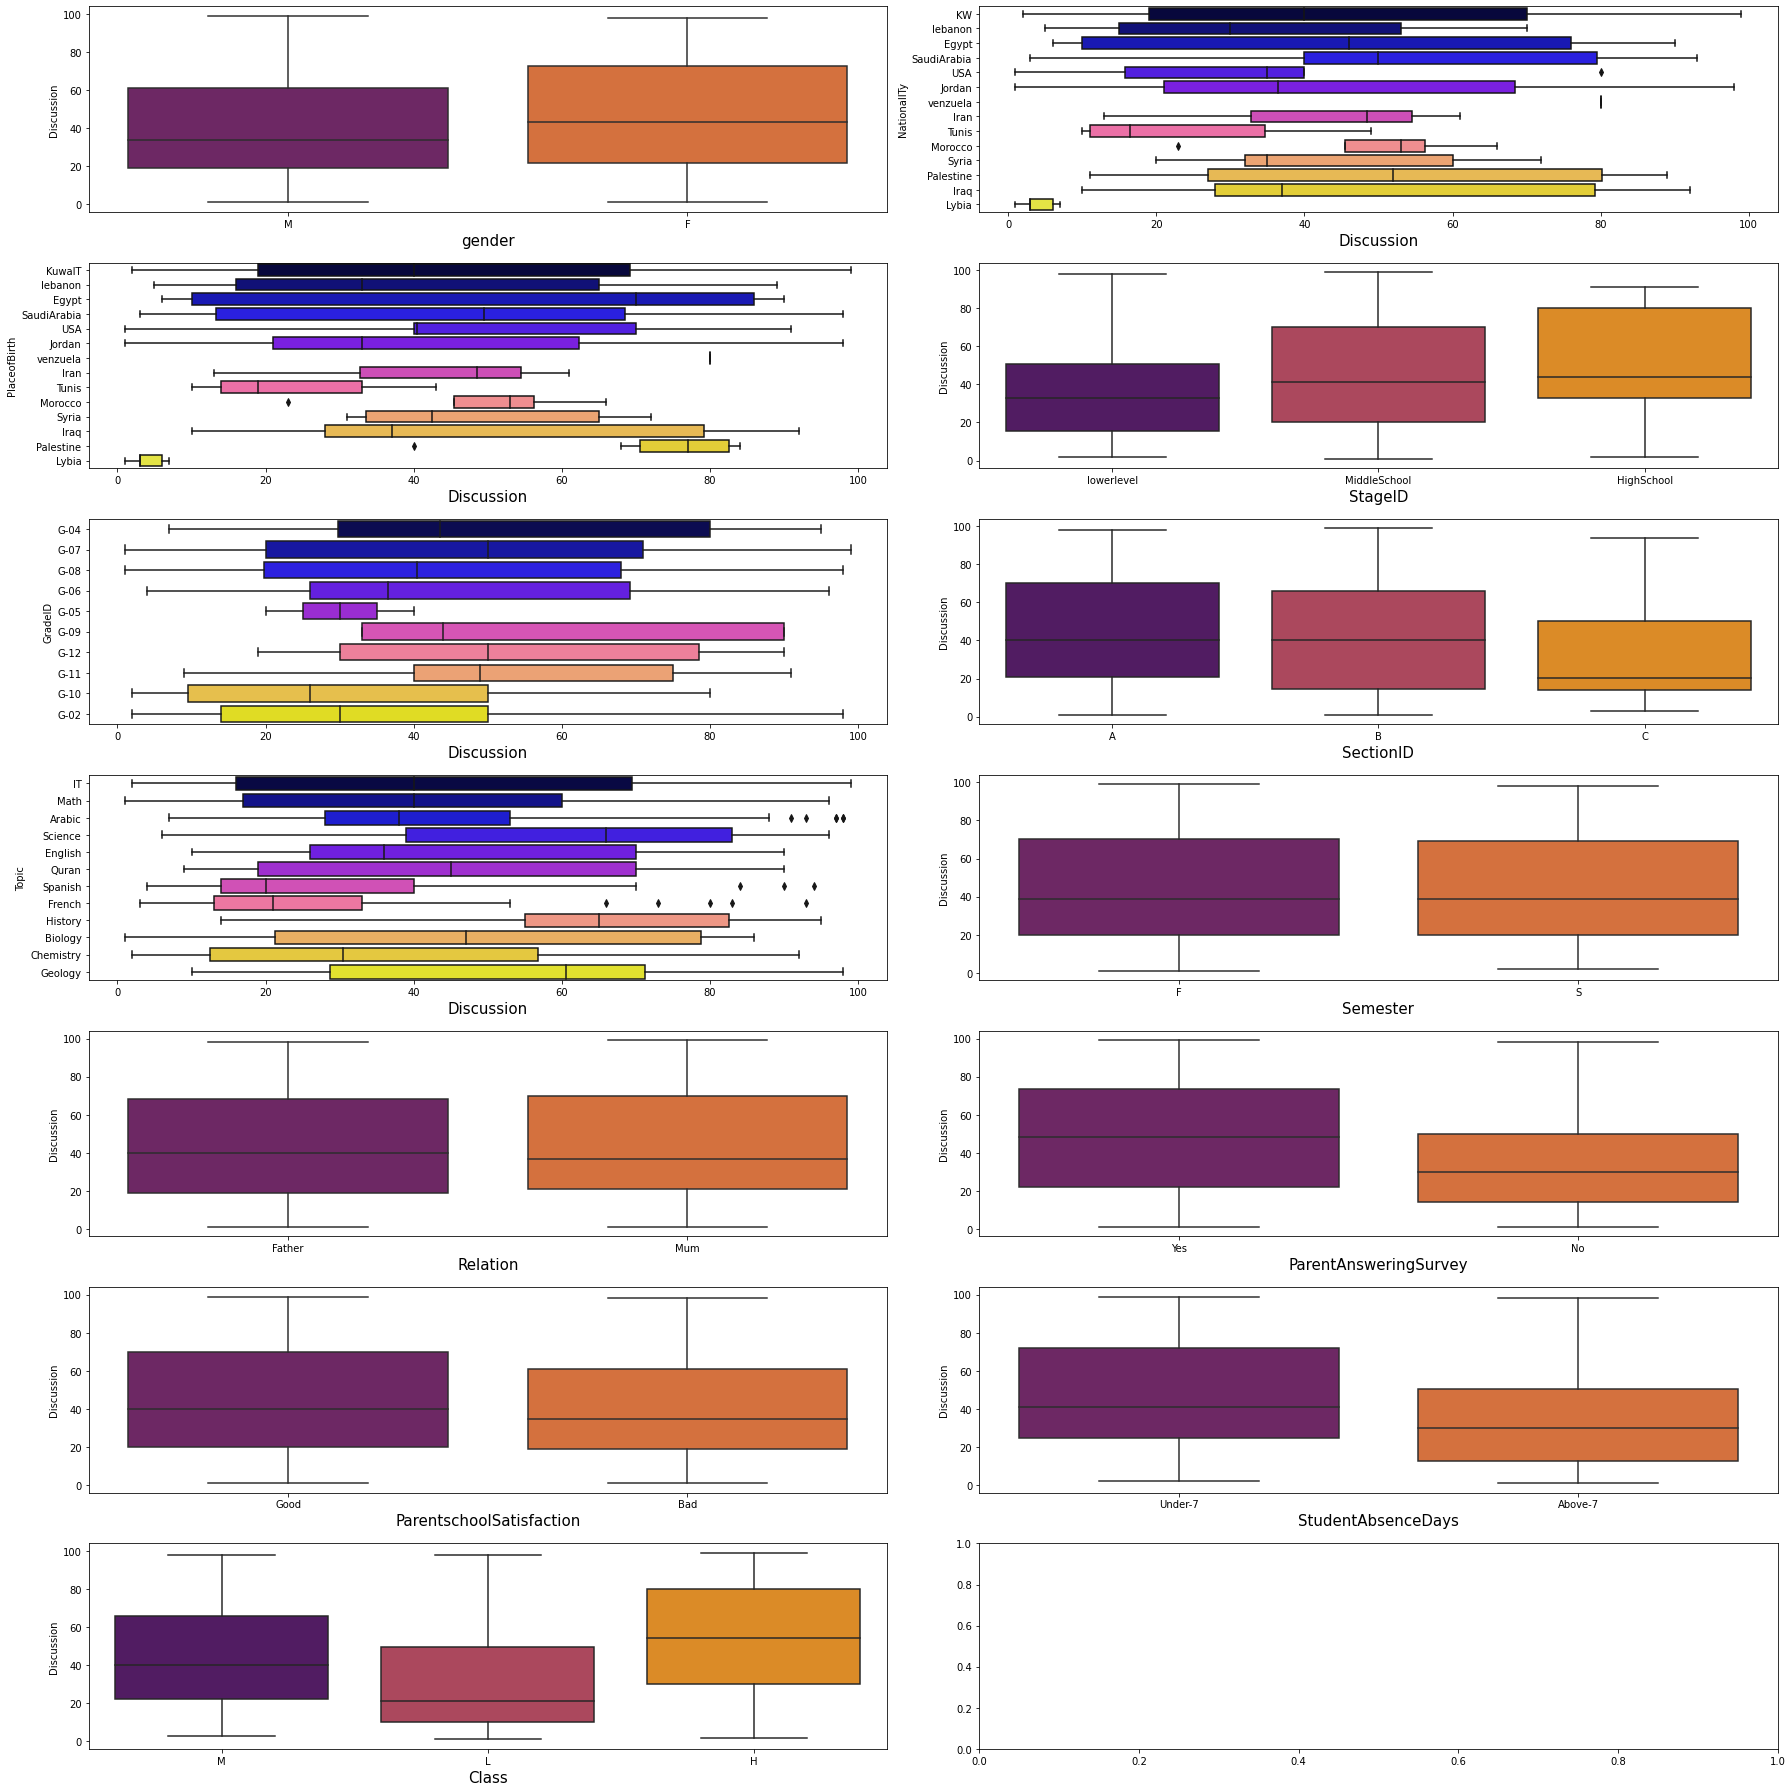

In [95]:
fig, ax = plt.subplots(7, 2, figsize=(25,25))
idx = 0
for i in range(7):
  for j in range(2):
    if i == 6 and j == 1:
      break
    if df[df_categoric.columns[idx]].nunique() > 3:
      sns.boxplot(data=df, x='Discussion', y=df_categoric.columns[idx], palette='gnuplot2', ax=ax[i][j])
      ax[i][j].set_xlabel('Discussion', fontsize=15)
      idx += 1
    else:
      sns.boxplot(data=df, x=df_categoric.columns[idx], y='Discussion', palette='inferno', ax=ax[i][j])   
      ax[i][j].set_xlabel(df_categoric.columns[idx], fontsize=15)
      idx += 1
plt.tight_layout()
plt.show()

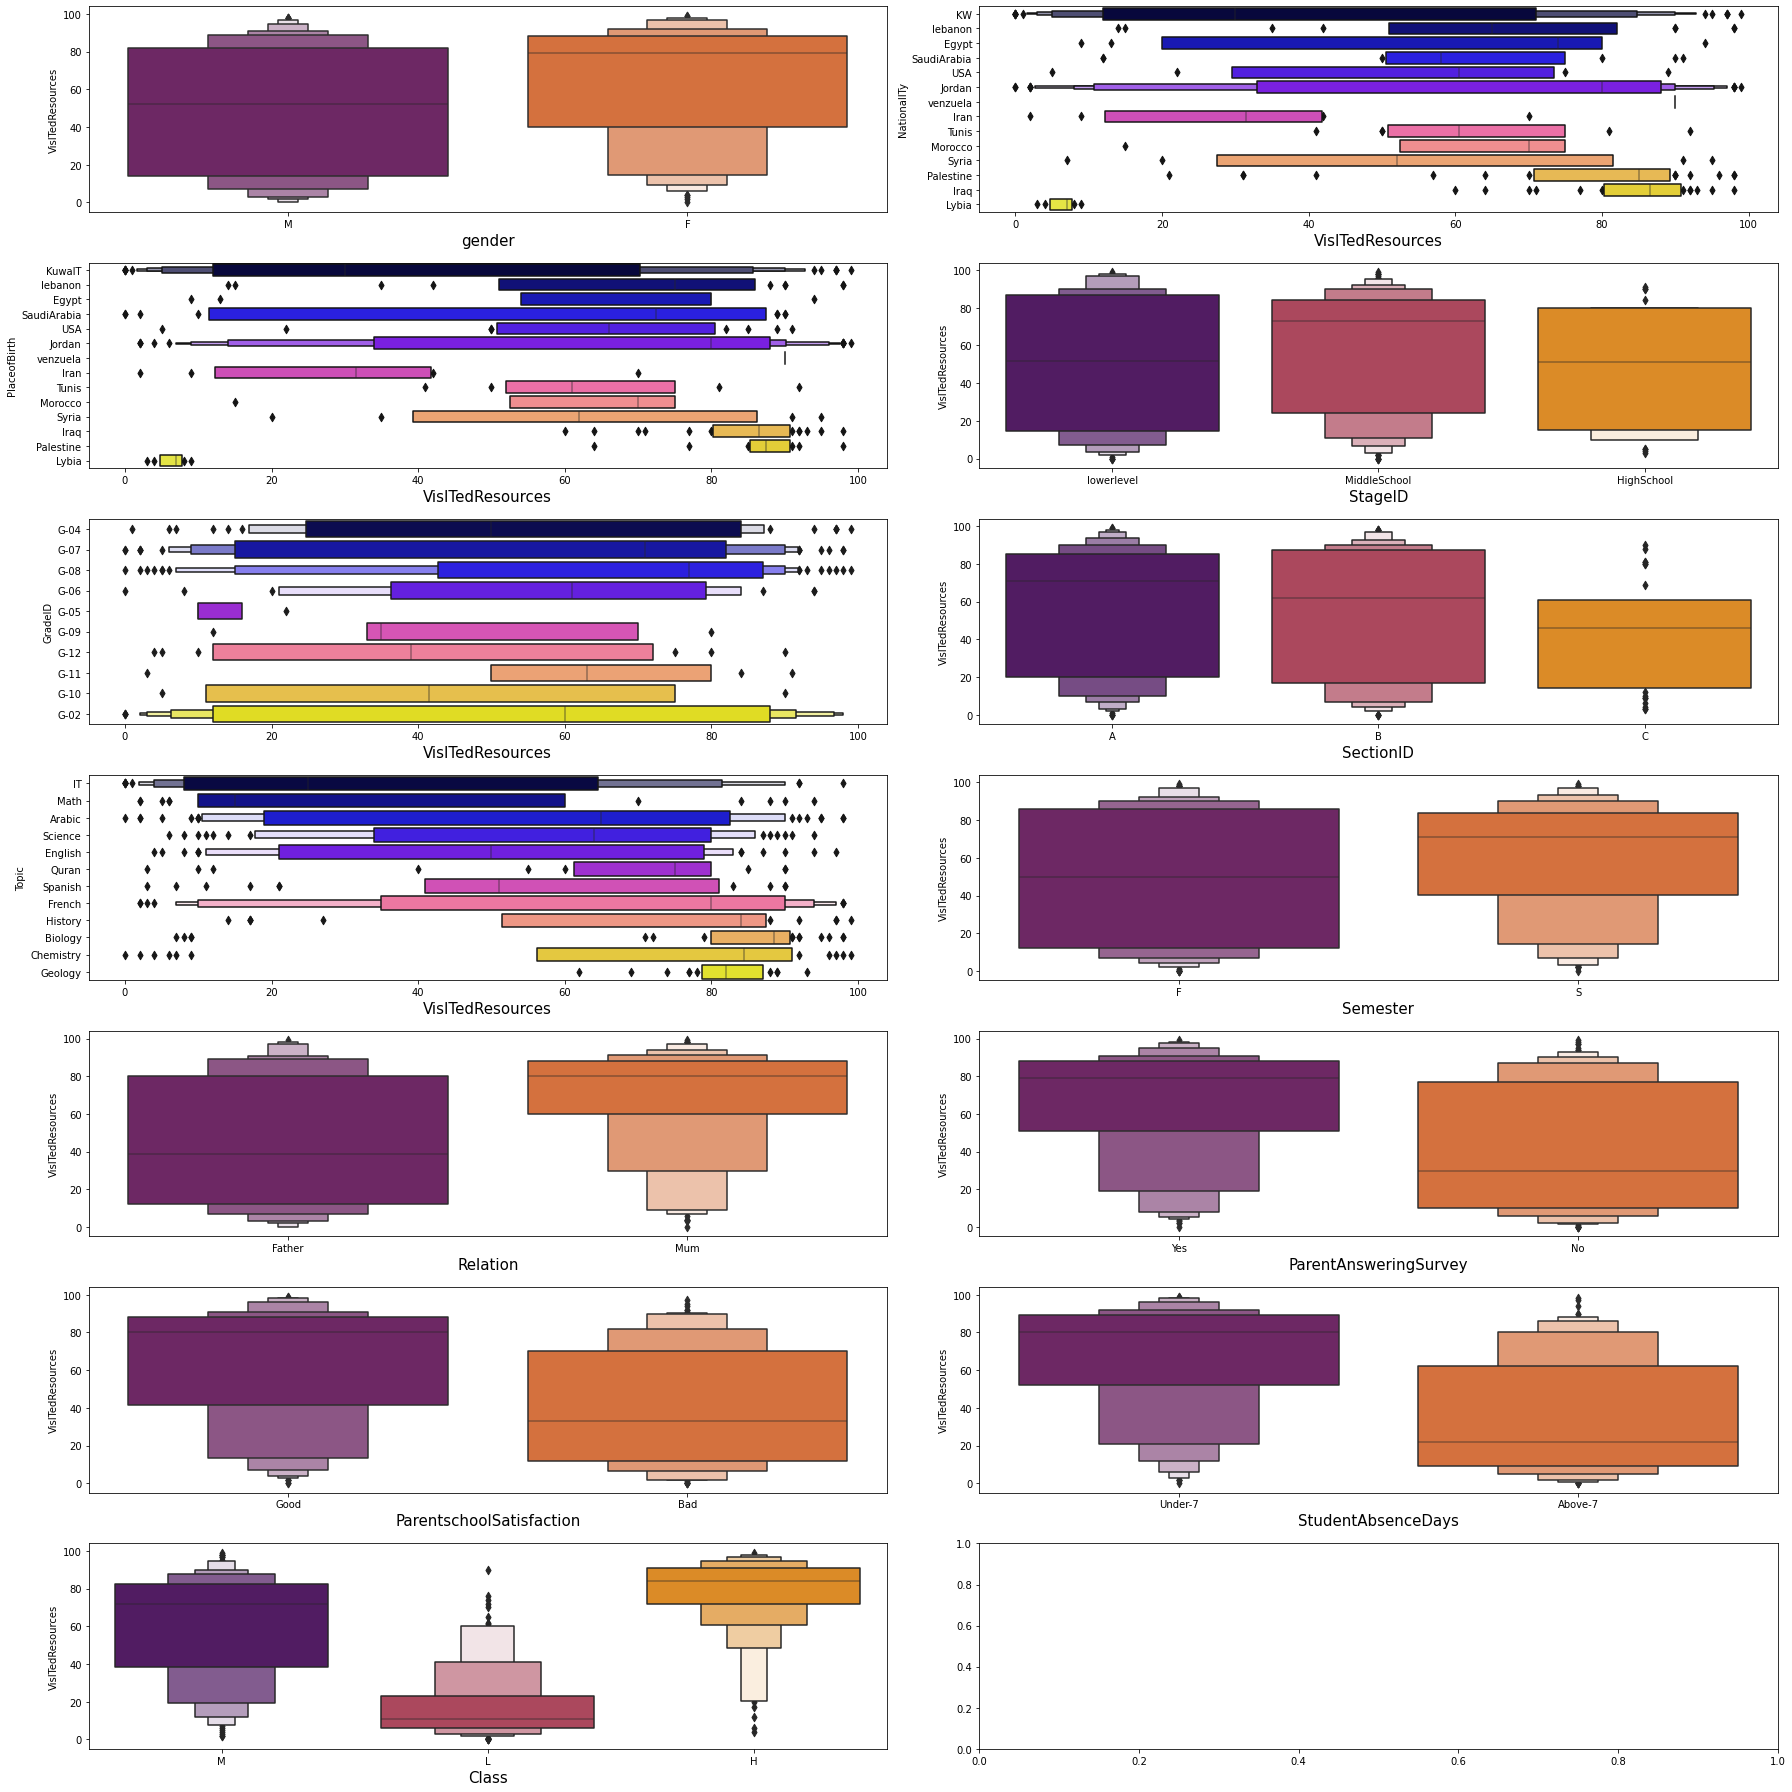

In [96]:
fig, ax = plt.subplots(7, 2, figsize=(25,25))
idx = 0
for i in range(7):
  for j in range(2):
    if i == 6 and j == 1:
      break
    if df[df_categoric.columns[idx]].nunique() > 3:
      sns.boxenplot(data=df, x='VisITedResources', y=df_categoric.columns[idx], palette='gnuplot2', ax=ax[i][j])
      ax[i][j].set_xlabel('VisITedResources', fontsize=15)
      idx += 1
    else:
      sns.boxenplot(data=df, x=df_categoric.columns[idx], y='VisITedResources', palette='inferno', ax=ax[i][j])   
      ax[i][j].set_xlabel(df_categoric.columns[idx], fontsize=15)
      idx += 1
plt.tight_layout()
plt.show()

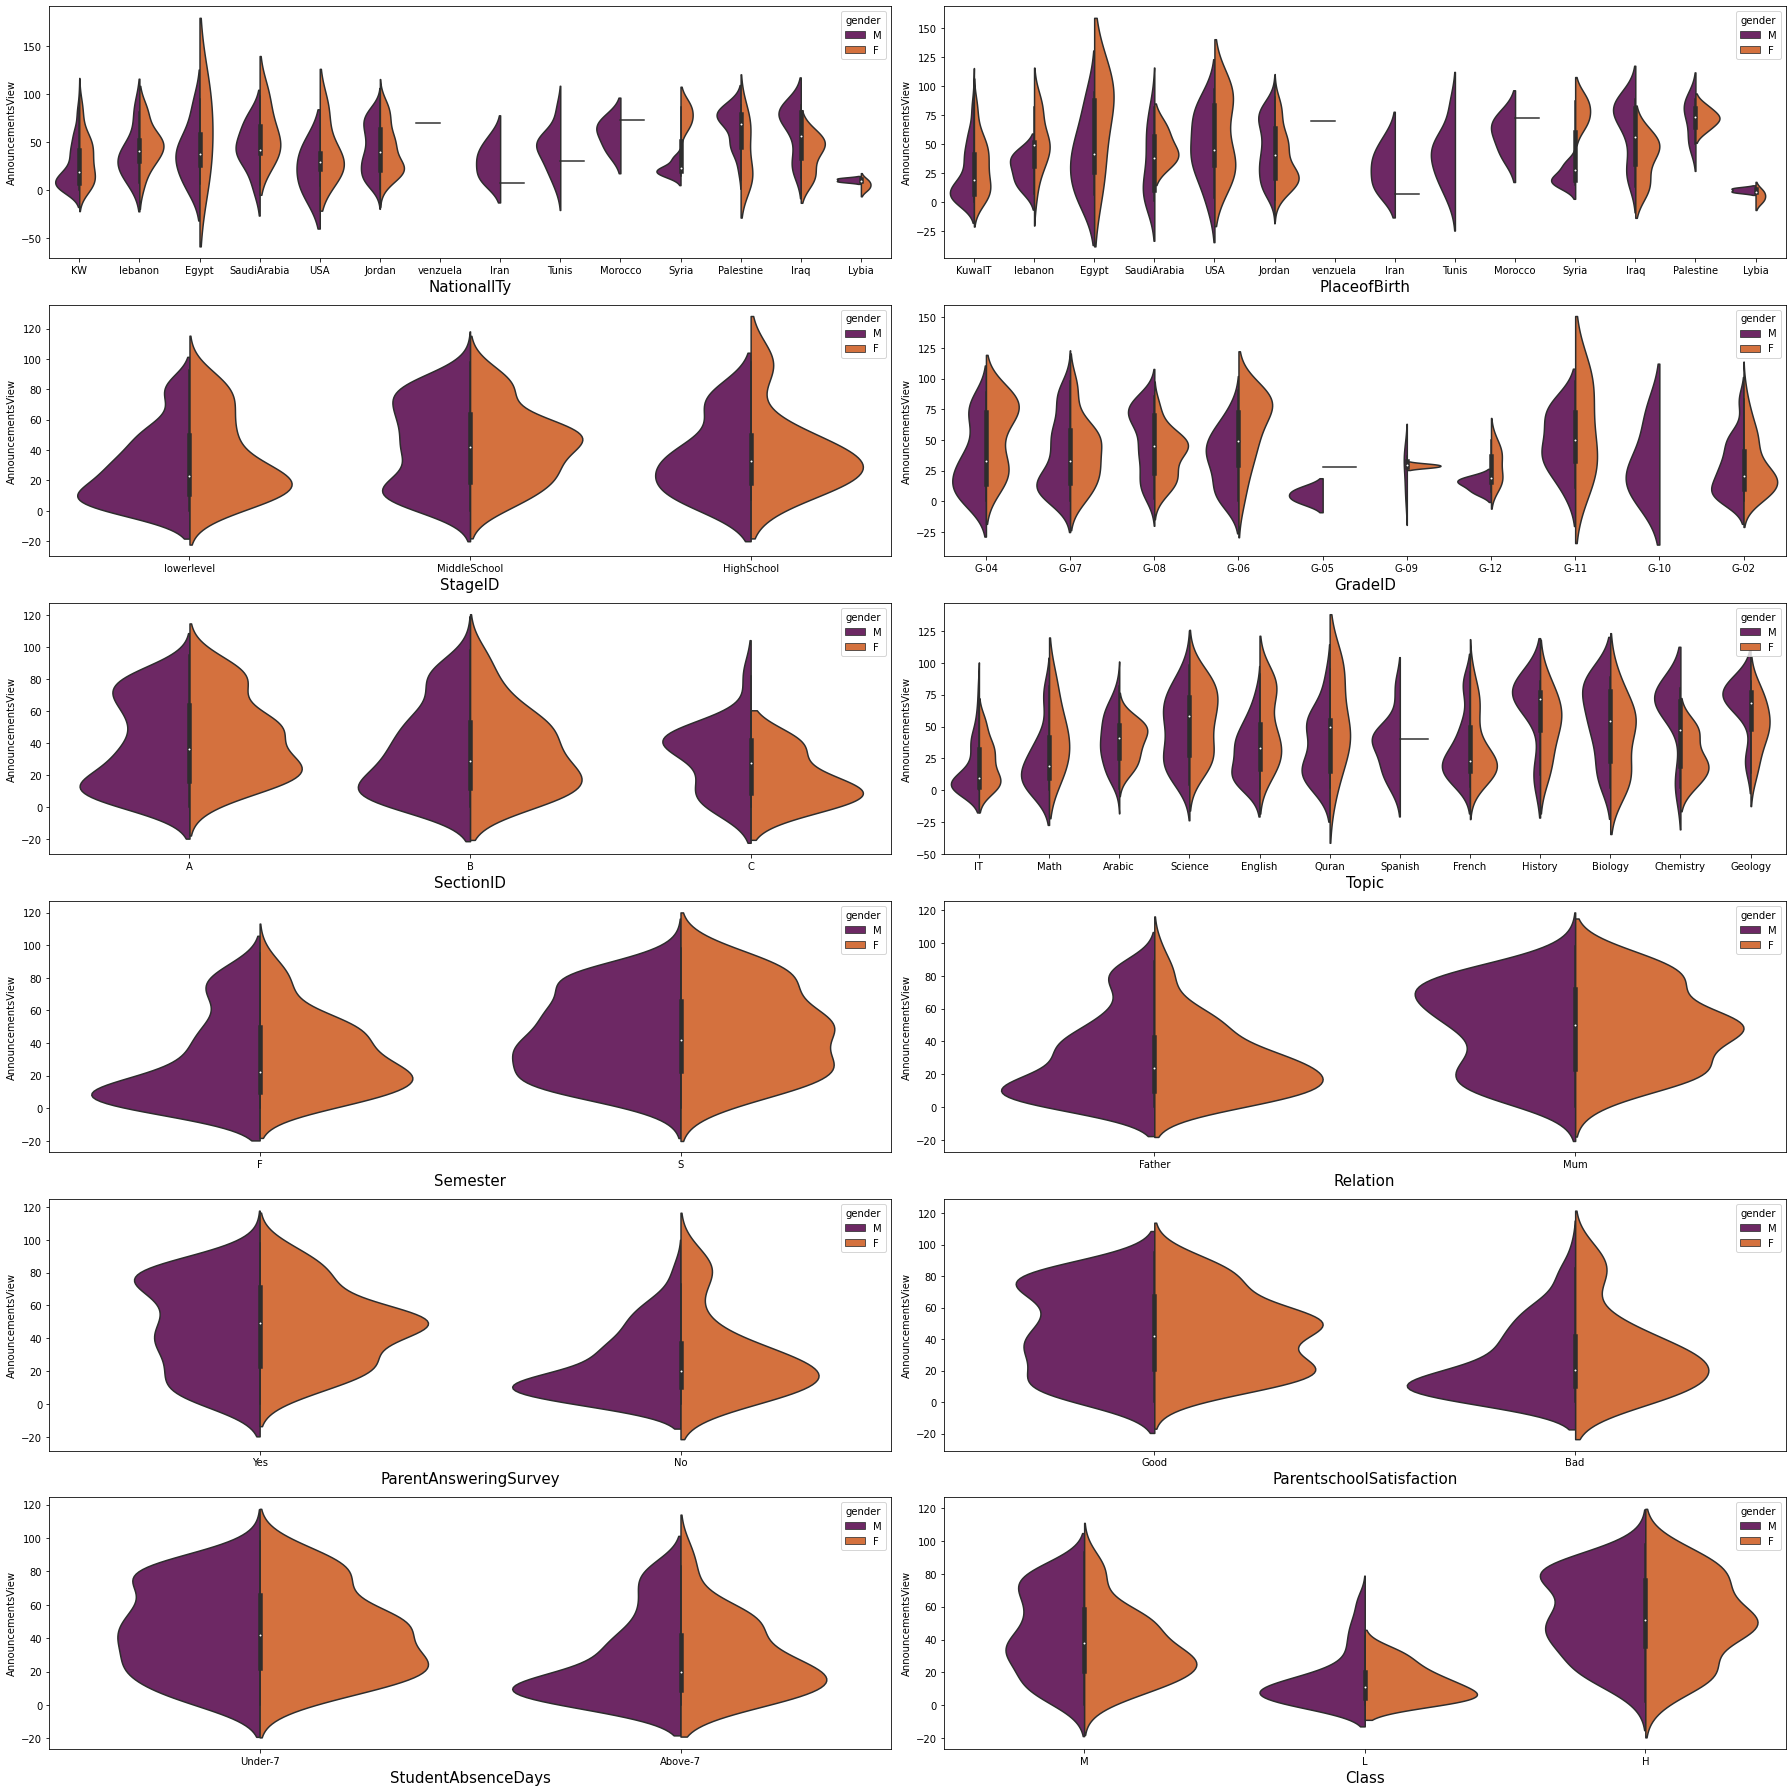

In [105]:
fig, ax = plt.subplots(6, 2, figsize=(25,25))
idx = 0
for i in range(6):
  for j in range(2):
    sns.violinplot(data=df, x=df_categoric.drop(columns=['gender']).columns[idx], y='AnnouncementsView', hue='gender', palette='inferno', split=True, ax=ax[i][j])   
    ax[i][j].set_xlabel(df_categoric.drop(columns=['gender']).columns[idx], fontsize=15)
    idx += 1
plt.tight_layout()
plt.show()